# D2.2 objective

Here we will filter the population to attended and with more or equal to 50 years old.

Also here takes place the previous simplification of variables and codes by frequency.


Global considerations:

We have divided EVENT file in 3 pickels:

    Type1 : Include the LAST numerical value for each patient-month. 
        MEASUREMENTS, LABORATORY, DRUG_DISPENSATIONS (with the boxes) and VISITS
    
    Type2: Events expanded that initially were expressed in periods.
        Currently we have one row for each month that this events where activated (included in the notebook 
        Preprocessing)
        Includes: DX (diagnosis), DRUG_PRESCRIPTIONS and SMOKING status.
    
    Type3: Deaths, excluded from the events dataframe

In [2]:
%matplotlib inline
from dateutil import relativedelta
from sklearn.externals import joblib
import datetime as dt
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd

In [3]:
events_type1 = joblib.load('pickles/numerical_events.pickle')
display(events_type1.head())
print('Events of type 1: ', events_type1.size)

,id,dat,val,new_code
1,6,2012-11-01,1.0,m_ALDIA
2,6,2012-11-01,5.0,m_ALHAB
3,6,2012-11-01,1.0,m_ALRIS
4,6,2012-11-01,6.0,m_ALSET
5,6,2012-11-01,138.0,m_EK201


Events of type 1:  162096656


In [5]:
events_type2 = joblib.load('pickles/final_events_periods.pickle')
display(events_type2.head())
m = (events_type2['new_code'].str[:2] == 'p_')
events_type2 = events_type2.loc[~m]
print('Events of type 2: ', events_type2.size)

,dat,id,new_code
0,2012-11-01,6,s_1.0
1,2012-12-01,6,s_1.0
2,2013-01-01,6,s_1.0
3,2013-02-01,6,s_1.0
4,2013-02-01,6,s_2.0


Events of type 2:  212852124


In [9]:
pob = joblib.load('pickles/p.pickle')
display(pob.head())
print('Original population size: ',pob['id'].size)
m = (events_type2['new_code'].str[:3] == 'd_C')
m2 = (events_type2['new_code'].str[:5] == 'd_C44')
pob_cancer = events_type2.loc[m&~m2].drop_duplicates(subset= 'id')['id'].tolist()
display(len(pob_cancer))

,id,sexe,qmedea,dnaix
0,8636519,D,U5,1959
1,10937990,H,U1,1937
2,1524971,D,U3,1933
3,9323816,H,U3,1950
4,6749464,H,U3,1938


Original population size:  197649


5281

In [10]:
m2 = (events_type1['new_code'].str[:2] == 'v_')
attended = events_type1.loc[m2].drop_duplicates(subset= 'id')['id'].tolist()
pob['dnaix'] = pob['dnaix'].astype(float)
pob_attend = pob.loc[pob['id'].isin(attended)]
print('Attended population at first:',pob_attend['id'].size)

Attended population at first: 175465


In [11]:
m = pob_attend['dnaix'] <= 1966
pob_attend = pob_attend.loc[m]
print('With more or 5 years old ',pob_attend['id'].size)

With more or 5 years old  60170


In [7]:
joblib.dump(pob_attend, 'pickles_ALL2/DEF_pob_sample.pickle', compress=3)

['pickles_ALL2/DEF_pob_sample.pickle']

In [12]:
m = events_type1['id'].isin(pob_attend['id'])
events1 = events_type1.loc[m]

m = events_type2['id'].isin(pob_attend['id'])
events2 = events_type2.loc[m]

In [9]:
print('EVENTS 1 SIZE ORIGINAL:' ,events_type1.size)
print('EVENTS 1 SAMPLED: ', events1.size)
print('EVENTS 2 SIZE ORIGINAL:' ,events_type2.size)
print('EVENTS 2 SAMPLED: ', events2.size)

EVENTS 1 SIZE ORIGINAL: 162096656
EVENTS 1 SAMPLED:  109826648
EVENTS 2 SIZE ORIGINAL: 212852124
EVENTS 2 SAMPLED:  98808234


In [10]:
deaths = joblib.load('pickles/deaths_events.pickle')
display(deaths.head())
print('Deaths: ', deaths.size)
m = deaths['id'].isin(pob_attend['id'])
deaths_s = deaths[m]
print('DEATHS SIZE ORIGINAL:' ,deaths.size)
print('DEATHS SAMPLED: ', deaths_s.size)
joblib.dump(deaths_s, 'pickles_ALL2/DEF_deaths.pickle', compress=3)

,id,dat
5152,1032,2014-03-01
6461,1414,2007-10-01
11759,2510,2012-10-01
14962,3037,2007-12-01
26401,6344,2009-12-01


Deaths:  25384
DEATHS SIZE ORIGINAL: 25384
DEATHS SAMPLED:  17400


['pickles_ALL2/DEF_deaths.pickle']

# CLEANING EVENTS1

In [6]:
def comparing_plots(df1, df2, var, ylim):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
   
    plt.suptitle('Comparative of events '+var+ ': frequency in cancer and wo cancer population', fontsize=18, fontweight='bold')

    plt.subplot(axes[0])
    axes[0].plot(df1)
    axes[0].set_ylim([0,ylim])
    plt.xticks([])
    plt.title('Frequency people with cancer')
    plt.ylabel('Frequency')
    plt.xlabel('Values')
   

    plt.subplot(axes[1])
    axes[1].plot(df2)
    axes[1].set_ylim([0,ylim])
    plt.xticks([])
    plt.title('Frequency people wo cancer')
    #plt.ylabel('#Registres')
    plt.xlabel('Values')
   
    plt.subplots_adjust(top=0.85)

In [13]:
cancers = events2['new_code'].str[:3] == 'd_C'
melanoma = events2['new_code'].str[:5] == 'd_C44'

list_can = events2.loc[cancers&~melanoma]['id'].drop_duplicates(keep = 'first').tolist()

print(len(list_can))
pob_can_list = (pob_attend['id'].isin(list_can))
print(len(pob_can_list))

4930
60170


In [14]:
pob_cancer = pob_attend.loc[pob_can_list]
pob_no_cancer = pob_attend.loc[~pob_can_list]

print(len(pob_cancer))
print(len(pob_no_cancer))

4930
55240


In [14]:
pob_cancer.head()

,id,sexe,qmedea,dnaix
0,8636519,D,U5,1959.0
1,10937990,H,U1,1937.0
3,9323816,H,U3,1950.0
4,6749464,H,U3,1938.0
5,1429062,H,U4,1950.0


In [15]:
N_pob_c = pob_cancer['id'].size
N_pob_nc = pob_no_cancer['id'].size
m = events_type1['id'].isin(pob_cancer['id'])
list_vars1 = events1.loc[m].drop_duplicates(['id','new_code'])

list_vars1 = list_vars1.groupby('new_code').id.size().to_frame('N')
print(list_vars1.size)
list_vars1['freq'] = round(list_vars1['N']/N_pob_c,3)
cancer_list1 = list_vars1.sort_values('freq', ascending  = False)


list_vars1 = events1.loc[~m].drop_duplicates(['id','new_code'])

list_vars1 = list_vars1.groupby('new_code').id.size().to_frame('N')
print(list_vars1.size)
list_vars1['freq'] = round(list_vars1['N']/N_pob_nc,3)
nocancer_list1 = list_vars1.sort_values('freq', ascending  = False)

1751
2062


,N_x,freq_x,N_y,freq_y
new_code,,,,
v_MG_C,4926.0,0.999,54260.0,0.982
v_INF_C,4862.0,0.986,50065.0,0.906
m_EK201,4761.0,0.966,48390.0,0.876
m_EK202,4761.0,0.966,48390.0,0.876
l_CREAT,4610.0,0.935,44880.0,0.812


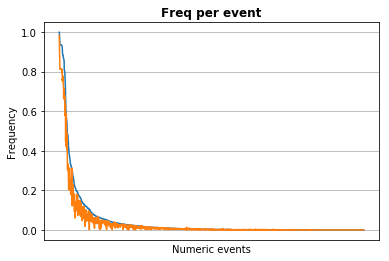

In [16]:
merge = cancer_list1.merge(nocancer_list1, on='new_code', how = 'outer').fillna(0)
display(merge.head())
plt.title('Freq per event', fontweight='bold')
plt.plot(merge.index, merge['freq_x'])
plt.plot(merge.index, merge['freq_y'])
plt.xticks([])
axes = plt.gca()
axes.grid()
plt.xlabel('Numeric events')
plt.ylabel('Frequency')
plt.show()

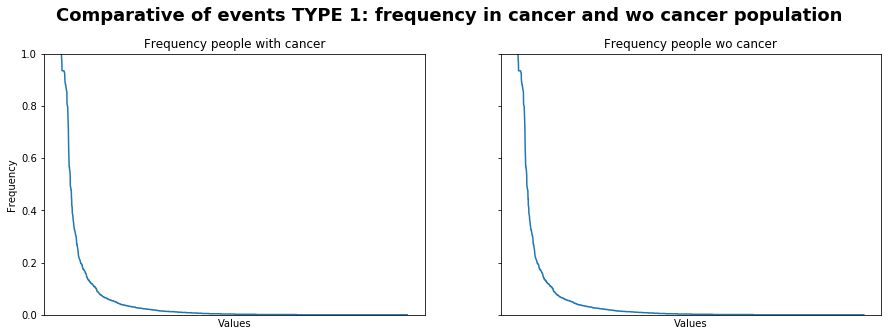

In [17]:
comparing_plots(merge['freq_x'], merge['freq_x'], 'TYPE 1', 1.0)

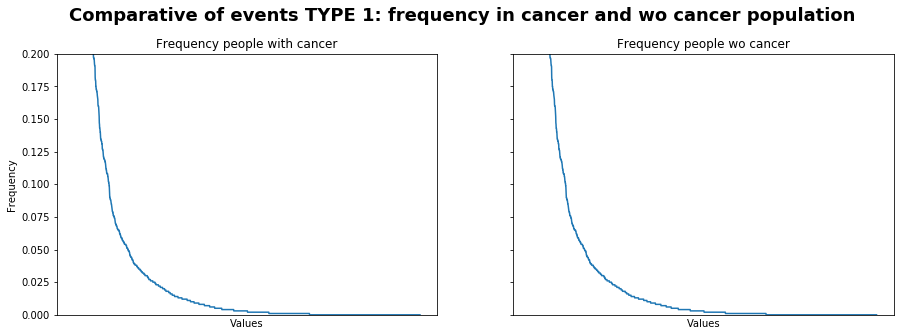

In [19]:
comparing_plots(merge['freq_x'], merge['freq_x'], 'TYPE 1', 0.2)

In [18]:
m = (merge['freq_x'] >= 0.02) | (merge['freq_y'] >= 0.02)
list1 = merge.loc[m]
list1_out = merge.loc[~m]
display(list1_out.head())
print('We will drop ', list1_out.index.size, ' variables')

,N_x,freq_x,N_y,freq_y
new_code,,,,
f_S02CA93,94.0,0.019,750.0,0.014
f_M02AA25,93.0,0.019,654.0,0.012
l_138.3,94.0,0.019,957.0,0.017
f_C08DA01,94.0,0.019,510.0,0.009
l_137.9,95.0,0.019,783.0,0.014


We will drop  1538  variables


In [20]:
m = events1['new_code'].isin(list1_out.index)
print('Pre code cleaning: ', events1.size)
N_pre = events1.groupby(['new_code'])['new_code'].count().size
print('Pre code cleaning: ', N_pre)
clean_events1 = events1.loc[~m]
print('Post code cleaning: ', clean_events1.size)
clean_events1 = clean_events1.drop_duplicates()
print('Final events of type 2: ', clean_events1.size)
N_post = clean_events1.groupby(['new_code'])['new_code'].count().size
print('Post code cleaning: ', N_post)
joblib.dump(clean_events1, 'pickles_ALL2/DEF_events1_not_expanded.pickle', compress=3)

Pre code cleaning:  109826648
Pre code cleaning:  2087
Post code cleaning:  104474632
Final events of type 2:  104474632
Post code cleaning:  549


['pickles_ALL2/DEF_events1_not_expanded.pickle']

In [37]:
print('Variables diferents al inici: ', N_pre)
print('Variables diferents finals: ', N_post)

Variables diferents al inici:  2087
Variables diferents finals:  549


In [38]:
list1

,N_x,freq_x,N_y,freq_y
new_code,,,,
v_MG_C,4926.0,0.999,54260.0,0.982
v_INF_C,4862.0,0.986,50065.0,0.906
m_EK201,4761.0,0.966,48390.0,0.876
m_EK202,4761.0,0.966,48390.0,0.876
l_CREAT,4610.0,0.935,44880.0,0.812
l_LEUC_N,4611.0,0.935,44899.0,0.813
l_LINF_P,4611.0,0.935,44889.0,0.813
l_MON_P,4611.0,0.935,44895.0,0.813
l_GLICEMIA,4609.0,0.935,44922.0,0.813


# CLEANING EVENTS2

In [16]:
m = events_type2['id'].isin(pob_cancer['id'])

list_vars2 = events2.loc[m].drop_duplicates(['id','new_code'])
list_vars2 = list_vars2.groupby('new_code').id.size().to_frame('N')
print(list_vars2.size)

list_vars2['freq'] = round(list_vars2['N']/N_pob_c,3)
cancer_list2 = list_vars2.sort_values('freq', ascending  = False)

list_vars2 = events2.loc[~m].drop_duplicates(['id','new_code'])
list_vars2 = list_vars2.groupby('new_code').id.size().to_frame('N')
print(list_vars2.size)

list_vars2['freq'] = round(list_vars2['N']/N_pob_nc,3)
nocancer_list2 = list_vars2.sort_values('freq', ascending  = False)

3273
5372


,N_x,freq_x,N_y,freq_y
new_code,,,,
d_J00,1437.0,0.291,14051.0,0.254
s_0.0,1434.0,0.291,19580.0,0.354
s_2.0,1417.0,0.287,9518.0,0.172
b,1340.0,0.272,16992.0,0.308
d_I10,1132.0,0.230,12396.0,0.224


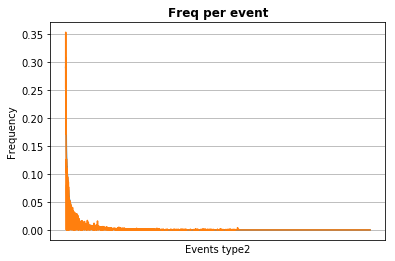

In [17]:
merge = cancer_list2.merge(nocancer_list2, on='new_code', how = 'outer').fillna(0)
display(merge.head())
plt.title('Freq per event', fontweight='bold')
plt.plot(merge.index, merge['freq_x'])
plt.plot(merge.index, merge['freq_y'])
plt.xticks([])
axes = plt.gca()
axes.grid()
plt.xlabel('Events type2')
plt.ylabel('Frequency')
plt.show()

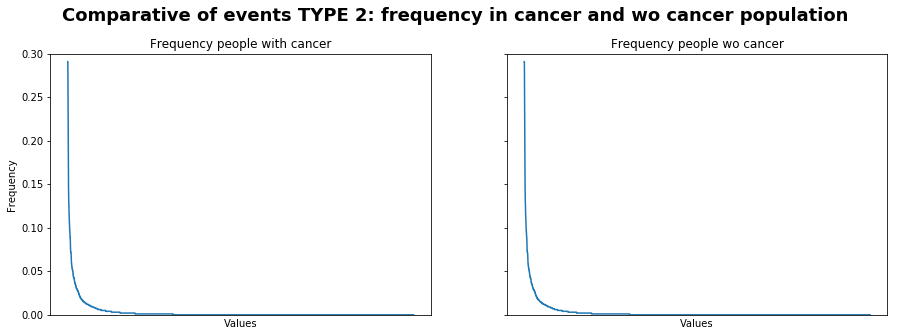

In [20]:
comparing_plots(merge['freq_x'], merge['freq_x'], 'TYPE 2', 0.3)

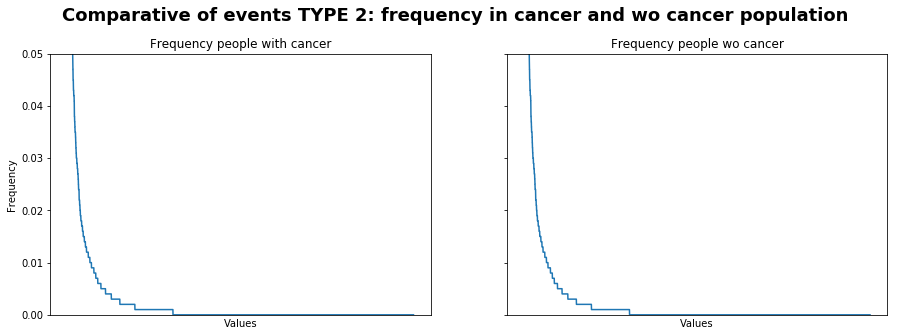

In [42]:
comparing_plots(merge['freq_x'], merge['freq_x'], 'TYPE 2', 0.05)

In [43]:
m = (merge['freq_x'] >= 0.01) | (merge['freq_y'] >= 0.01) | ((merge.index.str[:3] == 'd_C') & (merge.index.str[:5] != 'd_C44'))
list2 = merge.loc[m]
list2_out = merge.loc[~m]
display(list2_out.head())
print('We will drop ', list2_out.index.size, ' variables, and we will conserve ', list2.index.size)

,N_x,freq_x,N_y,freq_y
new_code,,,,
d_R06.5,45.0,0.009,486.0,0.009
d_R18,43.0,0.009,62.0,0.001
d_D47.2,43.0,0.009,4.0,0.000
d_D17,42.0,0.009,3.0,0.000
d_N92.1,46.0,0.009,206.0,0.004


We will drop  5298  variables, and we will conserve  498


In [44]:
m = events2['new_code'].isin(list2_out.index)
print('Pre code cleaning: ', events2.size)
N_pre = events2.groupby(['new_code'])['new_code'].count().size
print('Pre code cleaning: ', N_pre)
clean_events2 = events2.loc[~m]
print('Post code cleaning: ', clean_events2.size)
clean_events2 = clean_events2.drop_duplicates()
print('Final events of type 2: ', clean_events2.size)
N_post = clean_events2.groupby(['new_code'])['new_code'].count().size
print('Post code cleaning: ', N_post)
joblib.dump(clean_events2, 'pickles_ALL2/DEF_events2_not_expanded.pickle', compress=3)

Pre code cleaning:  98808234
Pre code cleaning:  5796
Post code cleaning:  77041104
Final events of type 2:  77041104
Post code cleaning:  498


['pickles_ALL2/DEF_events2_not_expanded.pickle']

In [45]:
print('Variables diferents al inici: ', N_pre)
print('Variables diferents finals: ', N_post)

Variables diferents al inici:  5796
Variables diferents finals:  498


In [46]:
merge

,N_x,freq_x,N_y,freq_y
new_code,,,,
d_J00,1437.0,0.291,14051.0,0.254
s_0.0,1434.0,0.291,19580.0,0.354
s_2.0,1417.0,0.287,9518.0,0.172
b,1340.0,0.272,16992.0,0.308
d_I10,1132.0,0.230,12396.0,0.224
d_M54.5,1099.0,0.223,10964.0,0.198
s_1.0,1090.0,0.221,10166.0,0.184
d_M25.5,952.0,0.193,9848.0,0.178
d_T14.1,934.0,0.189,6137.0,0.111


In [47]:
clean_events1['dat'] = clean_events1['dat'].apply(lambda x: x + relativedelta.relativedelta(months=1))
joblib.dump(clean_events1, 'pickles_ALL2/ALL_events1_moved.pickle', compress = 3)

clean_events2['dat'] = clean_events2['dat'].apply(lambda x: x + relativedelta.relativedelta(months=1))
joblib.dump(clean_events2, 'pickles_ALL2/ALL_events2_moved.pickle', compress = 3)

deaths_s['dat'] = deaths_s['dat'].apply(lambda x: x + relativedelta.relativedelta(months=1))
joblib.dump(deaths_s, 'pickles_ALL2/DEF_deaths_moved.pickle', compress = 3)


pob_attend['sexe'] = pob_attend['sexe'].map({'D': 0, 'H': 1 })
joblib.dump(pob_attend, 'pickles_ALL2/ALL_pob_sex.pickle', compress = 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


['pickles_ALL2/ALL_pob_sex.pickle']